## Naive Bayes 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)

In [6]:
X.shape, y.shape

((150, 4), (150,))

In [8]:
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

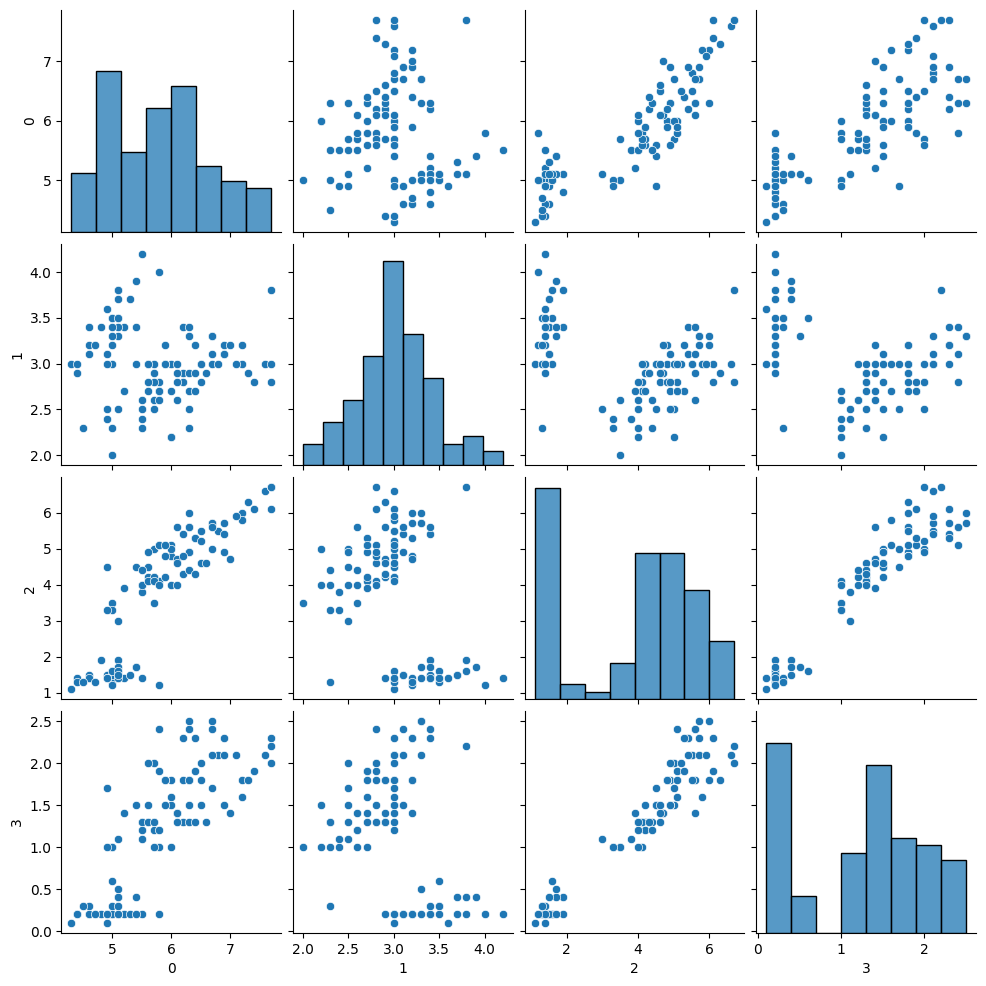

In [10]:
sns.pairplot(pd.DataFrame(X_train))

In [11]:
gnb = GaussianNB()

In [12]:
gnb.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred = gnb.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
accuracy_score(y_test, y_pred)*100

96.0

In [18]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [22]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
accuracy_score(y_test, y_pred)*100


96.0

In [23]:
gnb = BernoulliNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)*100

30.0